In [2]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *

In [10]:
df_t = load_iedb_tcellepitopes(only_standard_amino_acids=True, human_only=True)
df_b = load_iedb_bcellepitopes()

In [73]:
for df in [df_t, df_b]:
    print(df['Epitope', 'Parent Species'].value_counts().head())

Mycobacterium tuberculosis    27327
Vaccinia virus                22916
Blattella germanica           17120
Homo sapiens                  16583
Hepacivirus C                 12775
Name: (Epitope, Parent Species), dtype: int64
Trypanosoma cruzi         174319
Homo sapiens               51913
Onchocerca volvulus        13071
Hepacivirus C               8778
Streptococcus pyogenes      7869
Name: (Epitope, Parent Species), dtype: int64


In [13]:
epi_t = df_t['Epitope', 'Description']
epi_b = df_b['Epitope', 'Description']

In [65]:
k = 1
dfhuman = counter_to_df(count_kmers_proteome(human, k))
dfiedb_t = counter_to_df(count_kmers_iterable(epi_t, k))
dfiedb_b = counter_to_df(count_kmers_iterable(epi_b, k))
for df in [dfhuman, dfiedb_t, dfiedb_b]:
    df.sort_values('seq', inplace=True)
dfm = pd.DataFrame.from_dict(dict(seq=list(dfhuman['seq']),
                   human=list(dfhuman['freq']),
                   iedb_t=list(dfiedb_t['freq']),
                   iedb_b=list(dfiedb_b['freq'])))

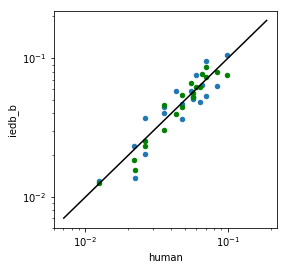

In [67]:
fig, ax = plt.subplots(figsize=(4, 4))
x = np.logspace(np.log10(dfm['human'].min())-0.25, np.log10(dfm['iedb_t'].max())+0.25)
plt.plot(x, x, 'k')
dfm.plot('human', 'iedb_t', kind='scatter', logx=True, logy=True, ax=ax)
dfm.plot('human', 'iedb_b', kind='scatter', logx=True, logy=True, ax=ax, color='g')
#ax.set_xlim(2e-7, 5e-3)
#ax.set_ylim(2e-7, 5e-3)

In [68]:
dfm['fold_t'] = dfm['iedb_t']/dfm['human']
dfm['fold_b'] = dfm['iedb_b']/dfm['human']

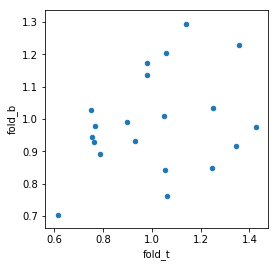

In [76]:
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('fold_t', 'fold_b', kind='scatter', ax=ax)

In [80]:
scipy.stats.spearmanr(dfm['fold_t'], dfm['fold_b']), np.corrcoef(np.log(dfm['fold_t']), np.log(dfm['fold_b']))[1, 0]

(SpearmanrResult(correlation=0.23308270676691725, pvalue=0.32267802500462284),
 0.3517946846261271)